# Petro.ai Subsurface Data Assessment.

## Part 1 - Data
For this task, you will read data from example files that we work with regularly and visualize the contents.  It is recommended that you use Python for this step but can use another language or data analysis application (like Spotfire) if you wish.  Feel free to demonstrate your ability and creativity with the visualizations you create to tell the best story with this data. This could be anything from static plots to an interactive dashboard.   

In the `data/part1/ folder`, you will find three files: 
* A LAS file containing well logs (`4200000000_Petro1.las`) 
* An attribute grid (`ATTR1_map.csv`) 
* Production data (`MonthlyProduction.csv`)  

#### 1A) Well Log Data
* Read the LAS file.   
* Plot the Gamma Ray curve vs. Depth. 
* Extract the latitude/longitude of this well 

 
#### 1B) Attribute Grids
* Read the attribute grid. 
* Plot the spatial variation of the ATTR1 property 
* Show the location of the well from part A. 
* **Bonus**: what is the value of ATTR1 at the well location from part A? 

#### 1C) Production Data
* Read the production file. 
* Plot the monthly production from the well in part A 
* Determine the total production (oil, gas, water) for each well.  
* Determine the total barrel of oil equivalent (BOE) produced for each well.  Use a suitable conversion factor to convert MCF gas to BOE, and assume 1 bbl oil = 1 BOE.
* Save this summary data to a csv file for all wells that produced more than 100,000 BOE.  How many wells have BOE > 100,000? 
* Determine the well with the highest total BOE. 

If you use Python for this step, feel free to use this notebook as a starter.  Please submit your code and the results that it generates.  You can just submit a notebook if you do all your work here.


In [1]:
import pandas as pd
import lasio as ls
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
las_file_list = []
path = 'C:/Users/dylwh/Desktop/subsurface_data_assessment-main/data/part1/'
files = os.listdir(path)
files

['42000000_Petro1.las',
 'ATTR1_map.csv',
 'MonthlyProduction.csv',
 'MonthlyProduction.xlsx']

In [3]:
petro1 = ls.read('C:/Users/dylwh/Desktop/subsurface_data_assessment-main/data/part1/42000000_Petro1.las')
petro1.curves

[CurveItem(mnemonic="MD", unit="ft", value="", descr="Measured Depth", original_mnemonic="MD", data.shape=(21579,)),
 CurveItem(mnemonic="BH_CALI", unit="unitless", value="", descr="Bad Hole Caliper = 3in Delta 3ft Window", original_mnemonic="BH_CALI", data.shape=(21579,)),
 CurveItem(mnemonic="BH_DRHO", unit="unitless", value="", descr="Bad Hole Density Correction = -0.1>DRHO or DRHO>0.10", original_mnemonic="BH_DRHO", data.shape=(21579,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="Caliper", original_mnemonic="CALI", data.shape=(21579,)),
 CurveItem(mnemonic="DPHI_UNK", unit="v/v", value="", descr="Density Porosity Unknown", original_mnemonic="DPHI_UNK", data.shape=(21579,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="Bulk Density Correction", original_mnemonic="DRHO", data.shape=(21579,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="Gamma Ray", original_mnemonic="GR", data.shape=(21579,)),
 CurveItem(mnemonic="NPHI", unit="v/v", value="", des

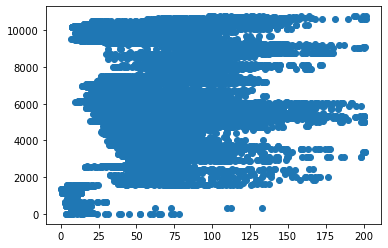

In [4]:
GRvD = plt.scatter(x="GR",y="MD", data=petro1)

In [5]:
petro1.well

[HeaderItem(mnemonic="STRT", unit="ft", value="2.0", descr="First reference val"),
 HeaderItem(mnemonic="STOP", unit="ft", value="10791.0", descr="Last reference "),
 HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr="Step increment"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Missing value"),
 HeaderItem(mnemonic="WELL", unit="", value="PETRO1", descr="Well name"),
 HeaderItem(mnemonic="UWI", unit="", value="4200000000", descr="Unique Well ID"),
 HeaderItem(mnemonic="API", unit="", value="4200000000", descr="API Number"),
 HeaderItem(mnemonic="LONG", unit="", value="-103.663049999873", descr="Longitu"),
 HeaderItem(mnemonic="LATI", unit="", value="31.5180500000053", descr="Latitude")]

In [6]:
LONG = print(petro1.well.LONG.value)
LATI = print(petro1.well.LATI.value)

-103.663049999873
31.5180500000053


In [7]:
df_petro = petro1.df()

In [8]:
df_petro.shape

(21579, 14)

In [9]:
df_petro.columns

Index(['BH_CALI', 'BH_DRHO', 'CALI', 'DPHI_UNK', 'DRHO', 'GR', 'NPHI',
       'NPHI_UNK', 'RDEEP', 'RDEEP_LAT', 'RDEEP_LOG_10', 'RSHAL', 'RSHAL_LAT',
       'RXO'],
      dtype='object')

In [10]:
df_petro2 = df_petro.rename_axis('MD').reset_index()

In [11]:
df_petro2.shape

(21579, 15)

In [12]:
df_petro2.describe()

,MD,BH_CALI,BH_DRHO,CALI,DPHI_UNK,DRHO,GR,NPHI,NPHI_UNK,RDEEP,RDEEP_LAT,RDEEP_LOG_10,RSHAL,RSHAL_LAT,RXO
count,21579.000000,20767.000000,20760.000000,20761.000000,20521.000000,20760.000000,21526.000000,21547.000000,21547.000000,20627.000000,20627.000000,20627.000000,20268.000000,20268.000000,20678.000000
mean,5396.500000,0.002504,0.013295,10.733608,0.074108,0.021573,62.472625,0.107019,0.107019,1691.933277,1691.933277,2.035250,280.435050,280.435050,318.046203
std,3114.732533,0.049978,0.114537,2.416847,0.103790,0.025348,38.912129,0.093211,0.093211,4526.885970,4526.885970,1.047186,447.683724,447.683724,556.098712
min,2.000000,0.000000,0.000000,6.157000,-0.213000,-0.049000,0.364000,-0.028000,-0.028000,0.621000,0.621000,-0.206908,0.632000,0.632000,0.195000
25%,2699.250000,0.000000,0.000000,8.532000,0.041000,0.004000,34.274000,0.030000,0.030000,14.618500,14.618500,1.164903,10.653250,10.653250,10.400000
50%,5396.500000,0.000000,0.000000,9.295000,0.080000,0.017000,58.509000,0.106000,0.106000,70.726000,70.726000,1.849579,45.397000,45.397000,38.973000
75%,8093.750000,0.000000,0.000000,12.950000,0.119000,0.033000,89.788500,0.159000,0.159000,536.075500,536.075500,2.729226,317.706750,317.706750,337.279750
max,10791.000000,1.000000,1.000000,18.198000,0.699000,0.384000,201.322000,0.700000,0.700000,51645.203100,51645.203100,4.713030,2094.257100,2094.257100,2094.257100


In [13]:
df_petro2.isna().sum()

MD                 0
BH_CALI          812
BH_DRHO          819
CALI             818
DPHI_UNK        1058
DRHO             819
GR                53
NPHI              32
NPHI_UNK          32
RDEEP            952
RDEEP_LAT        952
RDEEP_LOG_10     952
RSHAL           1311
RSHAL_LAT       1311
RXO              901
dtype: int64

In [14]:
df_drop = df_petro2.dropna(subset=['GR'])

In [15]:
df_drop.describe()

,MD,BH_CALI,BH_DRHO,CALI,DPHI_UNK,DRHO,GR,NPHI,NPHI_UNK,RDEEP,RDEEP_LAT,RDEEP_LOG_10,RSHAL,RSHAL_LAT,RXO
count,21526.000000,20715.000000,20707.000000,20710.000000,20472.000000,20707.000000,21526.000000,21526.000000,21526.000000,20607.000000,20607.000000,20607.000000,20250.000000,20250.000000,20627.000000
mean,5383.250000,0.002510,0.013329,10.740215,0.074167,0.021576,62.472625,0.106924,0.106924,1693.557983,1693.557983,2.036010,280.667597,280.667597,318.787394
std,3107.082642,0.050041,0.114681,2.416140,0.103903,0.025357,38.912129,0.093206,0.093206,4528.781741,4528.781741,1.047409,447.814672,447.814672,556.585707
min,2.000000,0.000000,0.000000,6.157000,-0.213000,-0.049000,0.364000,-0.028000,-0.028000,0.621000,0.621000,-0.206908,0.632000,0.632000,0.195000
25%,2692.625000,0.000000,0.000000,8.535000,0.041000,0.004000,34.274000,0.030000,0.030000,14.595000,14.595000,1.164204,10.651000,10.651000,10.349000
50%,5383.250000,0.000000,0.000000,9.300000,0.080000,0.017000,58.509000,0.106000,0.106000,71.178000,71.178000,1.852346,45.425000,45.425000,39.177000
75%,8073.875000,0.000000,0.000000,12.951000,0.119000,0.033000,89.788500,0.159000,0.159000,538.485000,538.485000,2.731174,319.377750,319.377750,338.088000
max,10764.500000,1.000000,1.000000,18.198000,0.699000,0.384000,201.322000,0.700000,0.700000,51645.203100,51645.203100,4.713030,2094.257100,2094.257100,2094.257100


# 1B
* Read the attribute grid. 
* Plot the spatial variation of the ATTR1 property 
* Show the location of the well from part A. 
* **Bonus**: what is the value of ATTR1 at the well location from part A? 

* An attribute grid (`ATTR1_map.csv`) 

# Start with reading the attribute grid. 

In [16]:
#pip install geopandas

In [17]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from pandas import read_csv
import matplotlib.pyplot as plt
filename = 'C:/Users/dylwh/Desktop/subsurface_data_assessment-main/data/part1/ATTR1_map.csv'
dataset = read_csv(filename)
crs={'init':'epsg:4326'}
dataset.head()

,longitude,latitude,ATTR1
0,-104.00,31.4,NaN
1,-103.99,31.4,NaN
2,-103.98,31.4,NaN
3,-103.97,31.4,NaN
4,-103.96,31.4,NaN


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  2460 non-null   float64
 1   latitude   2460 non-null   float64
 2   ATTR1      2301 non-null   float64
dtypes: float64(3)
memory usage: 57.8 KB


In [19]:
dataset.head(10)

,longitude,latitude,ATTR1
0,-104.00,31.4,NaN
1,-103.99,31.4,NaN
2,-103.98,31.4,NaN
3,-103.97,31.4,NaN
4,-103.96,31.4,NaN
5,-103.95,31.4,NaN
6,-103.94,31.4,NaN
7,-103.93,31.4,NaN
8,-103.92,31.4,NaN
9,-103.91,31.4,NaN


In [20]:
dataset.describe()

,longitude,latitude,ATTR1
count,2460.000000,2460.000000,2301.000000
mean,-103.705000,31.600000,0.779974
std,0.173216,0.118346,0.139038
min,-104.000000,31.400000,0.409981
25%,-103.852500,31.500000,0.696479
50%,-103.705000,31.600000,0.794837
75%,-103.557500,31.700000,0.885477
max,-103.410000,31.800000,0.999925


In [21]:
geometry = [Point(xy) for xy in zip(dataset['longitude'], dataset['latitude'])]
geo_df = gpd.GeoDataFrame(dataset,
 crs = crs,
 geometry = geometry)
geo_df = geo_df.drop(columns=['longitude','latitude'])

c:\Users\dylwh\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [22]:
geo_df.head()

,ATTR1,geometry
0,NaN,POINT (-104.00000 31.40000)
1,NaN,POINT (-103.99000 31.40000)
2,NaN,POINT (-103.98000 31.40000)
3,NaN,POINT (-103.97000 31.40000)
4,NaN,POINT (-103.96000 31.40000)


Long: -103.663049999873;
Lat: 31.5180500000053

In [23]:
coord = [['-103.663049999873'],['31.5180500000053'],['1']]
well_A = pd.DataFrame(coord).transpose()
well_A.columns=['longitude','latitude','loc']

well_A['longitude'] = well_A['longitude'].astype(float)
well_A['latitude'] = well_A['latitude'].astype(float)
well_A['loc'] = well_A['loc'].astype(float)
well_A = well_A
print(well_A.shape)
print(well_A)
print(well_A.dtypes)

(1, 3)
   longitude  latitude  loc
0 -103.66305  31.51805  1.0
longitude    float64
latitude     float64
loc          float64
dtype: object


In [24]:
geometry = [Point(xy) for xy in zip(well_A['longitude'], well_A['latitude'])]
well_df = gpd.GeoDataFrame(well_A,
 crs = crs,
 geometry = geometry)
well_df = well_df.drop(columns=['longitude','latitude'])
print(well_df)

c:\Users\dylwh\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


   loc                     geometry
0  1.0  POINT (-103.66305 31.51805)


Text(0.5, 1.0, 'ATTR1')

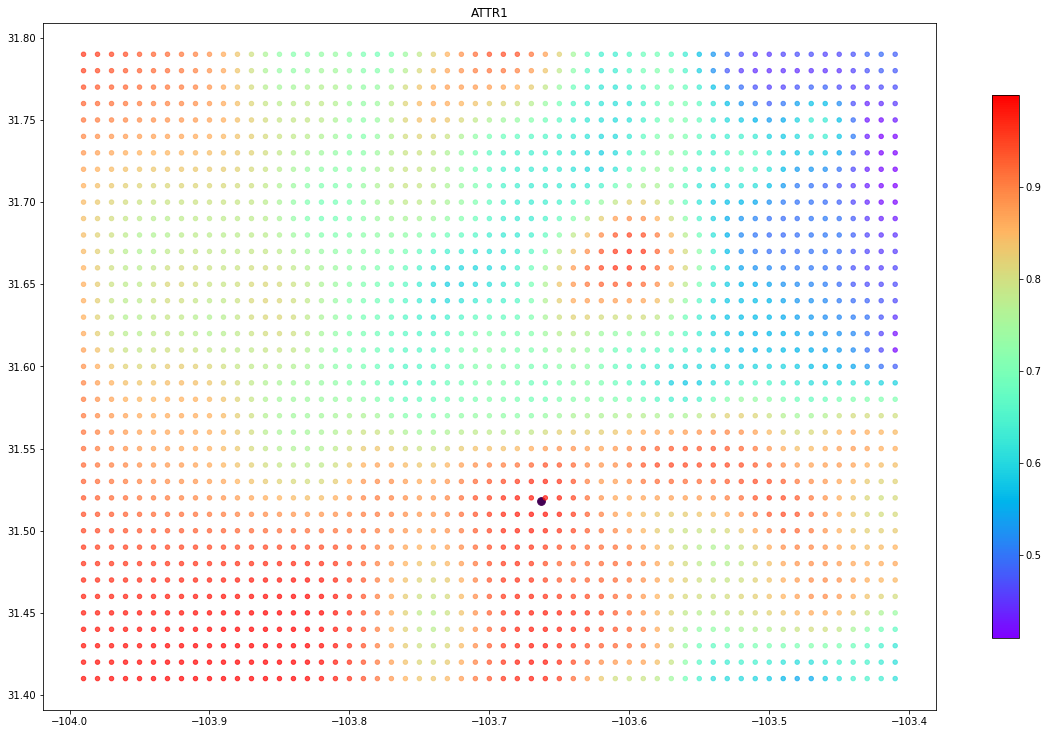

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
well_df.plot(column='loc' , ax=ax, marker='o',
    markersize=60, alpha=1)
geo_df.plot(column='ATTR1' , ax=ax , alpha=0.7 ,
    legend=True , cmap = 'rainbow',
    legend_kwds = {'shrink': 0.5}, markersize=20)
ax.set_title('ATTR1')

In [26]:
wella_ATTR1 = dataset[(dataset['longitude'] == -103.66) & (dataset['latitude'] == 31.51)]
print(wella_ATTR1)

     longitude  latitude     ATTR1                     geometry
694    -103.66     31.51  0.979536  POINT (-103.66000 31.51000)


# 1C) Production Data
* Read the production file. 
* Plot the monthly production from the well in part A 
* Determine the total production (oil, gas, water) for each well.  
* Determine the total barrel of oil equivalent (BOE) produced for each well.  Use a suitable conversion factor to convert MCF gas to BOE, and assume 1 bbl oil = 1 BOE.
* Save this summary data to a csv file for all wells that produced more than 100,000 BOE.  How many wells have BOE > 100,000? 
* Determine the well with the highest total BOE. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

filename = 'C:/Users/dylwh/Desktop/subsurface_data_assessment-main/data/part1/MonthlyProduction.csv'
#prod_df = read_csv(filename)

prod_df = read_csv(filename, index_col=['proddate'])
prod_df.dropna(axis=0)


,API,M_OIL_BBL,M_GAS_MCF,M_WATER_BBL
proddate,,,,
2008-09-01,4210932294,52.0,15134.0,2068.0
2008-10-01,4210932294,52.0,15134.0,2068.0
2008-11-01,4210932294,3.0,14351.0,1961.0
2008-12-01,4210932294,17.0,8195.0,1120.0
2009-01-01,4210932294,36.0,9949.0,1360.0
...,...,...,...,...
2021-09-01,4210932605,8.0,0.0,0.0
2021-10-01,4210932605,225.0,13344.0,1485.0
2021-11-01,4210932605,476.0,14446.0,1607.0


In [28]:
prod_df.shape

(10038, 4)

In [29]:
prod_df.head()

,API,M_OIL_BBL,M_GAS_MCF,M_WATER_BBL
proddate,,,,
2008-09-01,4210932294,52.0,15134.0,2068.0
2008-10-01,4210932294,52.0,15134.0,2068.0
2008-11-01,4210932294,3.0,14351.0,1961.0
2008-12-01,4210932294,17.0,8195.0,1120.0
2009-01-01,4210932294,36.0,9949.0,1360.0


In [30]:
well1_df = prod_df.loc[prod_df['API'] == 4200000000]
well1_df = well1_df.drop('API', axis=1)
well1_df.shape

(95, 3)

In [31]:
well1_df.head()
print(well1_df.dtypes)
print(well1_df.shape)
well1_df.dropna(axis=0).head()


M_OIL_BBL      float64
M_GAS_MCF      float64
M_WATER_BBL    float64
dtype: object
(95, 3)


,M_OIL_BBL,M_GAS_MCF,M_WATER_BBL
proddate,,,
2014-06-01,8460.0,84687.0,29015.0
2014-07-01,7907.0,90127.0,30879.0
2014-08-01,6533.0,74986.0,25692.0
2014-09-01,3130.0,34069.0,11673.0
2014-10-01,4253.0,56166.0,19244.0


Text(0, 0.5, 'Oil Rate (BBL/M), Gas Rate (MCF/M), Water Rate (BBL/M)')

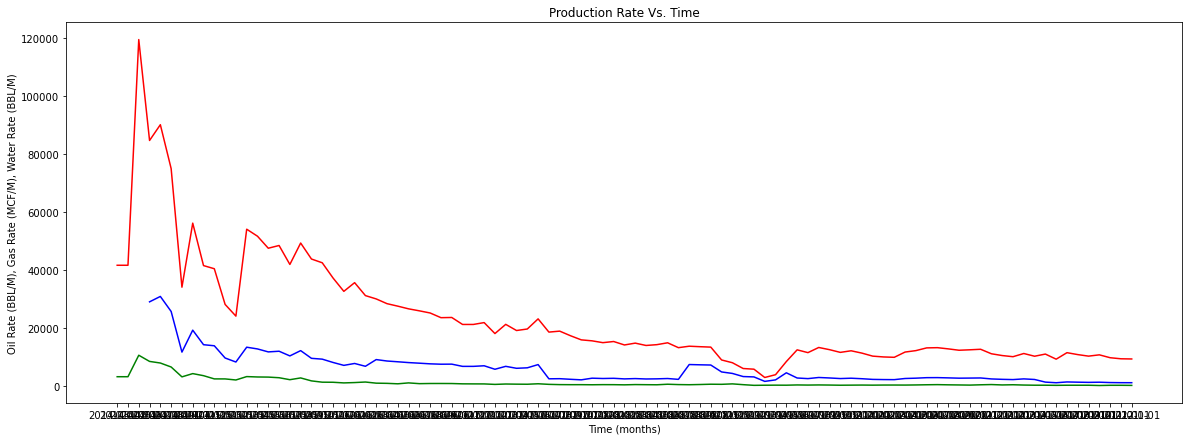

In [32]:
date = well1_df.index.values

fig=plt.figure(figsize=(20,7))
plt.plot(date,well1_df['M_OIL_BBL'], color='green')
plt.plot(date,well1_df['M_GAS_MCF'], color='red')
plt.plot(date,well1_df['M_WATER_BBL'], color='blue')
plt.title('Production Rate Vs. Time')
plt.xlabel('Time (months)')
plt.ylabel('Oil Rate (BBL/M), Gas Rate (MCF/M), Water Rate (BBL/M)')

In [33]:
#prod_df2 = prod_df()
Oil_volume = prod_df.groupby("API")['M_OIL_BBL'].sum()
Gas_volume = prod_df.groupby("API")['M_GAS_MCF'].sum()
Water_volume = prod_df.groupby("API")['M_WATER_BBL'].sum()
print(Oil_volume.head(10))
print(Gas_volume.head(10))
print(Water_volume.head(10))

API
4200000000    114553.0
4210932294       174.0
4210932339     52186.0
4210932344     27734.0
4210932345     28451.0
4210932346     19038.0
4210932351     13135.0
4210932352    253029.0
4210932353    113775.0
4210932356    273801.0
Name: M_OIL_BBL, dtype: float64
API
4200000000    2215781.0
4210932294     259757.0
4210932339    1095508.0
4210932344    1300762.0
4210932345    2034409.0
4210932346    1909938.0
4210932351    1141220.0
4210932352    3418213.0
4210932353    1918717.0
4210932356    2981025.0
Name: M_GAS_MCF, dtype: float64
API
4200000000    547738.0
4210932294    132264.0
4210932339    123486.0
4210932344    177316.0
4210932345    341595.0
4210932346    174035.0
4210932351     85697.0
4210932352    514785.0
4210932353    741176.0
4210932356    849886.0
Name: M_WATER_BBL, dtype: float64


In [34]:
prod_df['M_BOE6_BBL'] = prod_df['M_OIL_BBL'] + prod_df['M_GAS_MCF']/6

In [35]:
prod2_df = prod_df

In [36]:
prod2_df = prod2_df.reset_index()
prod2_df = prod2_df.drop('proddate',axis=1)

In [37]:
prod2_df.head()

,API,M_OIL_BBL,M_GAS_MCF,M_WATER_BBL,M_BOE6_BBL
0,4210932294,52.0,15134.0,2068.0,2574.333333
1,4210932294,52.0,15134.0,2068.0,2574.333333
2,4210932294,3.0,14351.0,1961.0,2394.833333
3,4210932294,17.0,8195.0,1120.0,1382.833333
4,4210932294,36.0,9949.0,1360.0,1694.166667


In [38]:
BOE6_volume = prod2_df.groupby("API")['M_BOE6_BBL'].sum()
print(BOE6_volume.head(10))

API
4200000000    483849.833333
4210932294     19089.666667
4210932339    234767.666667
4210932344    244527.666667
4210932345    367519.166667
4210932346    337361.000000
4210932351    203307.000000
4210932352    822731.166667
4210932353    433561.166667
4210932356    770638.500000
Name: M_BOE6_BBL, dtype: float64


In [39]:
prod2_df.columns

Index(['API', 'M_OIL_BBL', 'M_GAS_MCF', 'M_WATER_BBL', 'M_BOE6_BBL'], dtype='object')

In [40]:
prod2_df = prod2_df.groupby(['API'],as_index='API').sum()
prod2_df

,M_OIL_BBL,M_GAS_MCF,M_WATER_BBL,M_BOE6_BBL
API,,,,
4200000000,114553.0,2215781.0,547738.0,483849.833333
4210932294,174.0,259757.0,132264.0,19089.666667
4210932339,52186.0,1095508.0,123486.0,234767.666667
4210932344,27734.0,1300762.0,177316.0,244527.666667
4210932345,28451.0,2034409.0,341595.0,367519.166667
...,...,...,...,...
4210932590,318631.0,4031960.0,1538168.0,990421.500000
4210932592,214760.0,2576657.0,311994.0,644202.833333
4210932593,193437.0,1892454.0,307977.0,508846.000000


In [41]:
boe6_df = prod2_df[prod2_df['M_BOE6_BBL']>100000]

print(boe6_df.M_BOE6_BBL.count())

94


In [42]:
boe6_df.to_csv(r'./boe6_df.csv',header=True)

In [43]:
print(boe6_df[boe6_df.M_BOE6_BBL == boe6_df.M_BOE6_BBL.max()])

            M_OIL_BBL  M_GAS_MCF  M_WATER_BBL    M_BOE6_BBL
API                                                        
4210932581   354300.0  6601084.0    1139335.0  1.454481e+06
